## **MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

Curso: TC4029 - Ciencia y analítica de datos

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

## **Semana 7**
## Análisis de Componentes Principales (PCA)
---

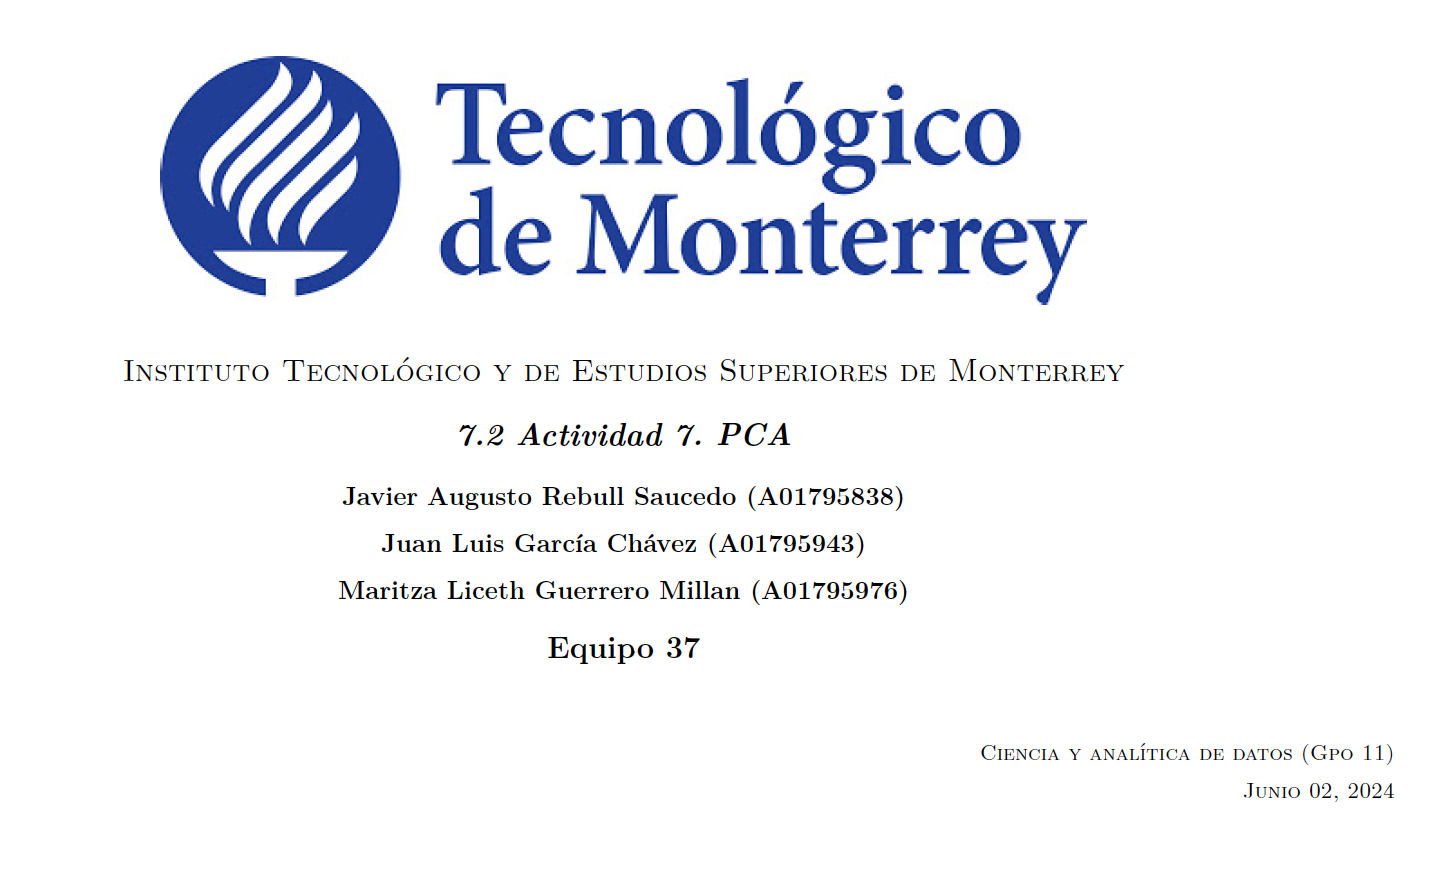

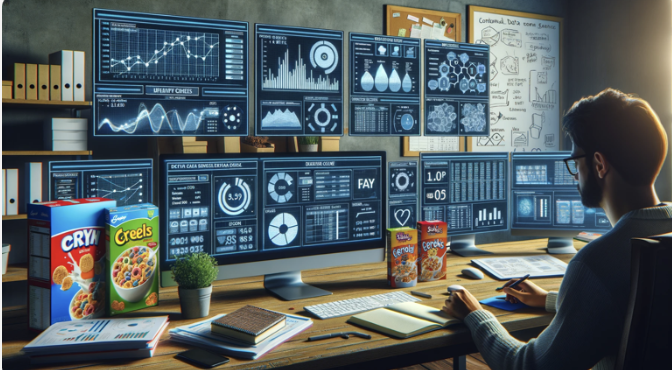

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/Actividad7_PCA"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
import locale
locale.setlocale(locale.LC_ALL, '')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

Estadísticas Descriptivas obtenidas con éxito
El DataFrame tiene 16 columnas y 77 registros totales.
El DataFrame tiene 13 columnas descriptivas.
Columnas descriptivas: ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']


         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  76.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.802632   
std     19.484119   1.094790   1.006473   83.832295   2.383364   3.907326   
min     50.000000   1.000000   0.000000    0.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.500000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

       

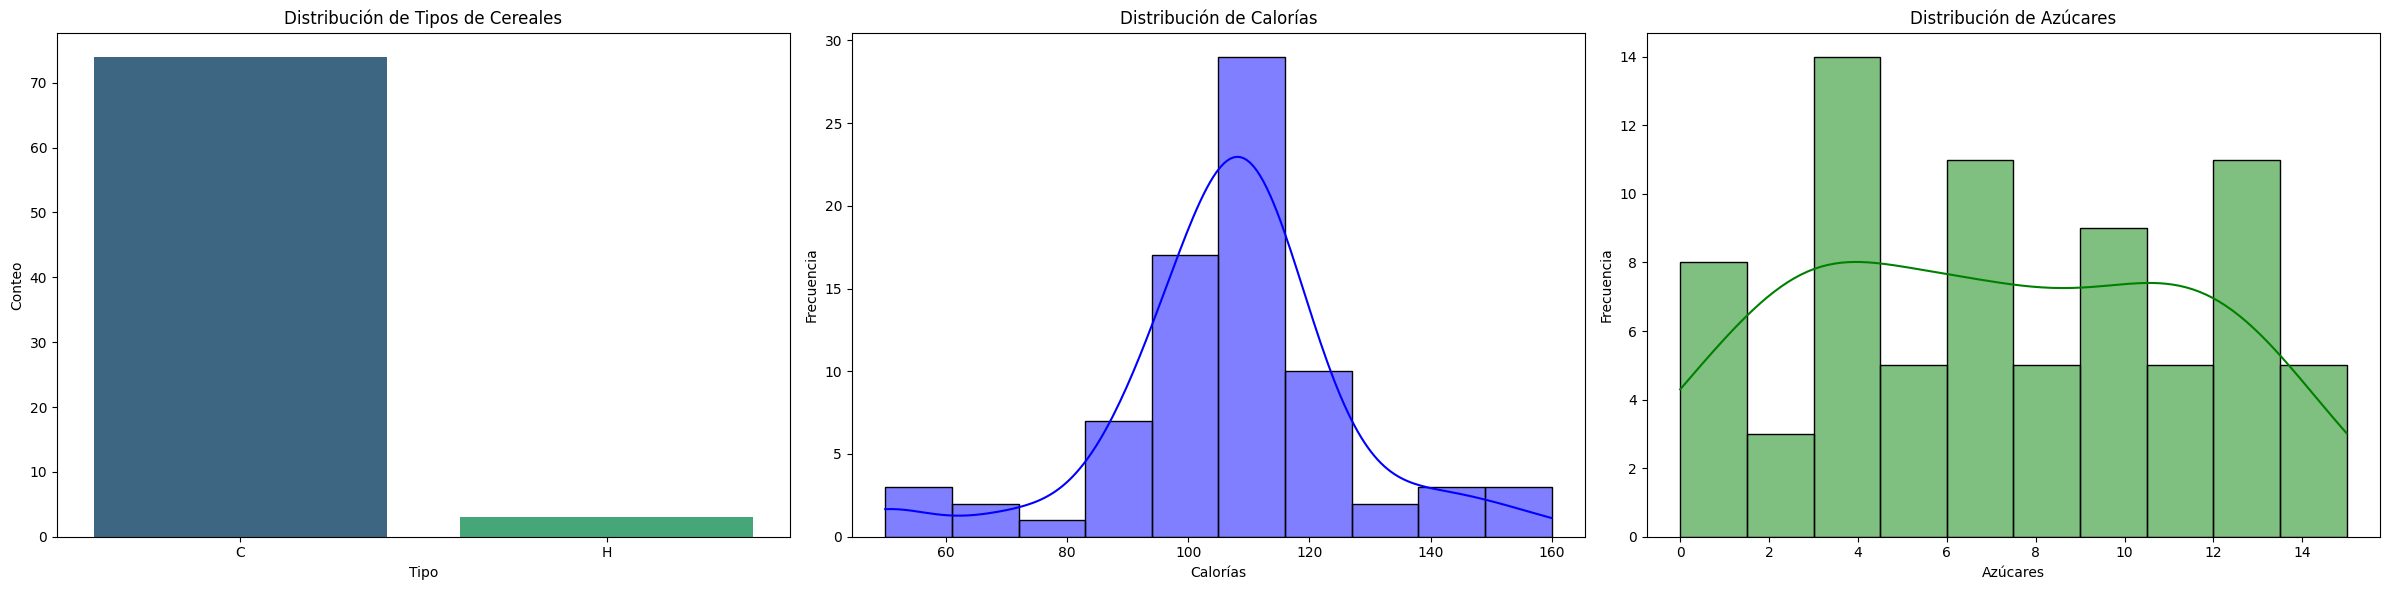

In [6]:
# Obtener estadísticas descriptivas
estadisticasDescriptivas = cereals_df.describe()

# Información adicional
numColumnas = cereals_df.shape[1]
numRegistros = cereals_df.shape[0]
numColumnasDescriptivas = estadisticasDescriptivas.shape[1]

print("Estadísticas Descriptivas obtenidas con éxito")
print(f"El DataFrame tiene {numColumnas} columnas y {numRegistros} registros totales.")
print(f"El DataFrame tiene {numColumnasDescriptivas} columnas descriptivas.")
print(f"Columnas descriptivas: {list(estadisticasDescriptivas.columns)}")
print("\n")

# Mostrar estadísticas descriptivas
print(estadisticasDescriptivas)
print("\n\n")

# Gráficos iniciales

fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Gráfico de barras para la distribución de tipos de cereales
sns.countplot(x='type', data=cereals_df, hue='type', palette='viridis', legend=False, ax=axs[0])
axs[0].set_title('Distribución de Tipos de Cereales')
axs[0].set_xlabel('Tipo')
axs[0].set_ylabel('Conteo')

# Gráfico de barras para la distribución de calorías
sns.histplot(cereals_df['calories'], bins=10, kde=True, color='blue', ax=axs[1])
axs[1].set_title('Distribución de Calorías')
axs[1].set_xlabel('Calorías')
axs[1].set_ylabel('Frecuencia')

# Gráfico de barras para la distribución de azúcares
sns.histplot(cereals_df['sugars'], bins=10, kde=True, color='green', ax=axs[2])
axs[2].set_title('Distribución de Azúcares')
axs[2].set_xlabel('Azúcares')
axs[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("\n\n")

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

Ejercicio 2a: ¿Cuál es la frecuencia o conteo de cada categoría para las variables: mfr y shelf (por separado)?
Frecuencia de cada fabricante (mfr)


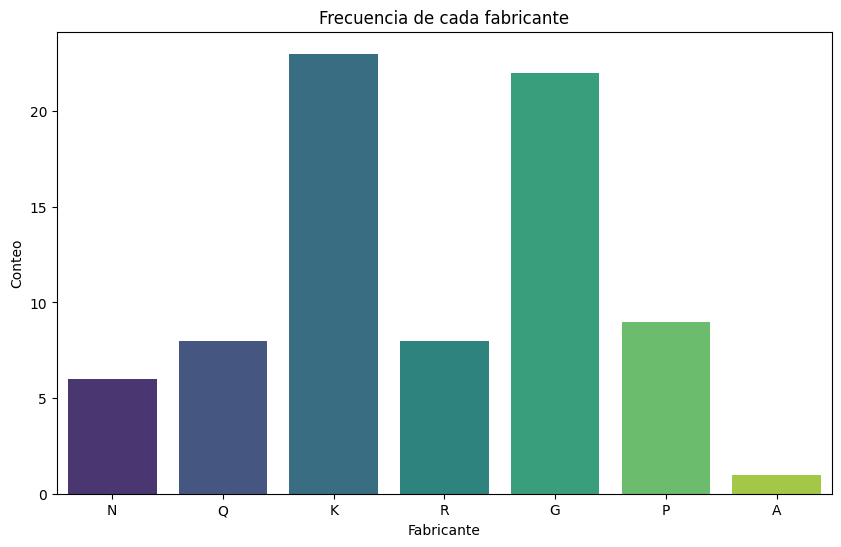




La frecuencia de cada fabricante (mfr) es la siguiente:
mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64


Frecuencia de cada estante (shelf)


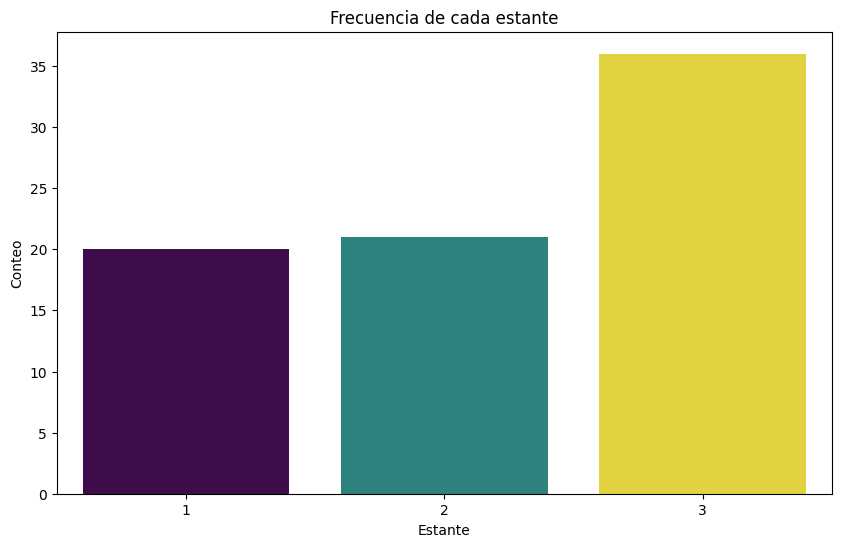




La frecuencia de cada estante (shelf) es la siguiente:
shelf
3    36
2    21
1    20
Name: count, dtype: int64




In [7]:
print("Ejercicio 2a: ¿Cuál es la frecuencia o conteo de cada categoría para las variables: mfr y shelf (por separado)?")

# Gráfico de barras para la frecuencia de cada fabricante
print("Frecuencia de cada fabricante (mfr)")
plt.figure(figsize=(10, 6))
sns.countplot(x='mfr', data=cereals_df, hue='mfr', palette='viridis', legend=False)
plt.title('Frecuencia de cada fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Conteo')
plt.show()
print("\n\n")

# Respuesta explícita
print("La frecuencia de cada fabricante (mfr) es la siguiente:")
print(cereals_df['mfr'].value_counts())
print("\n")

# Gráfico de barras para la frecuencia de cada estante
print("Frecuencia de cada estante (shelf)")
plt.figure(figsize=(10, 6))
sns.countplot(x='shelf', data=cereals_df, hue='shelf', palette='viridis', legend=False)
plt.title('Frecuencia de cada estante')
plt.xlabel('Estante')
plt.ylabel('Conteo')
plt.show()
print("\n\n")

# Respuesta explícita
print("La frecuencia de cada estante (shelf) es la siguiente:")
print(cereals_df['shelf'].value_counts())
print("\n")

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

Ejercicio 2b: Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.


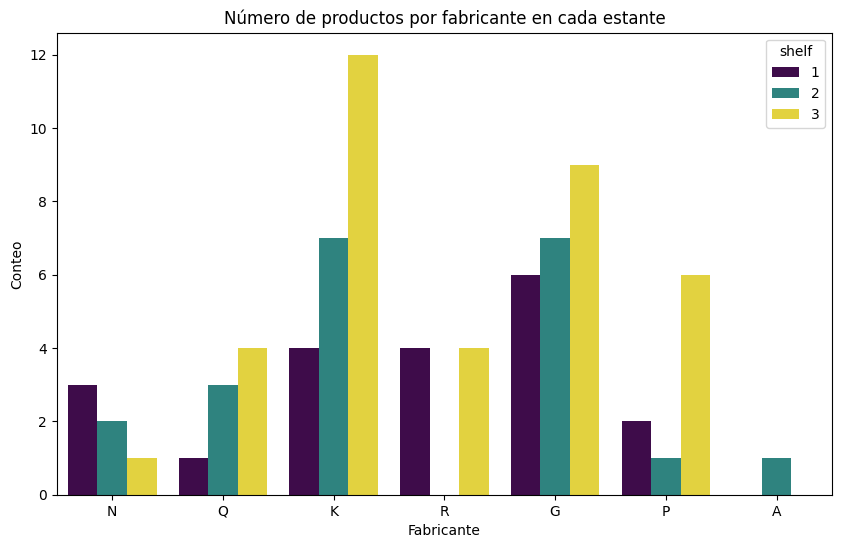




Número de productos por fabricante en cada estante:
shelf  1  2   3
mfr            
A      0  1   0
G      6  7   9
K      4  7  12
N      3  2   1
P      2  1   6
Q      1  3   4
R      4  0   4




In [8]:
print("Ejercicio 2b: Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.")
# Gráfico de barras combinado para fabricante y estante
plt.figure(figsize=(10, 6))
sns.countplot(x='mfr', hue='shelf', data=cereals_df, palette='viridis')
plt.title('Número de productos por fabricante en cada estante')
plt.xlabel('Fabricante')
plt.ylabel('Conteo')
plt.show()
print("\n\n")

# Respuesta explícita
print("Número de productos por fabricante en cada estante:")
print(pd.crosstab(cereals_df['mfr'], cereals_df['shelf']))
print("\n")

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

Ejercicio 3a: ¿Cuál es el rango más frecuente de la variable rating?


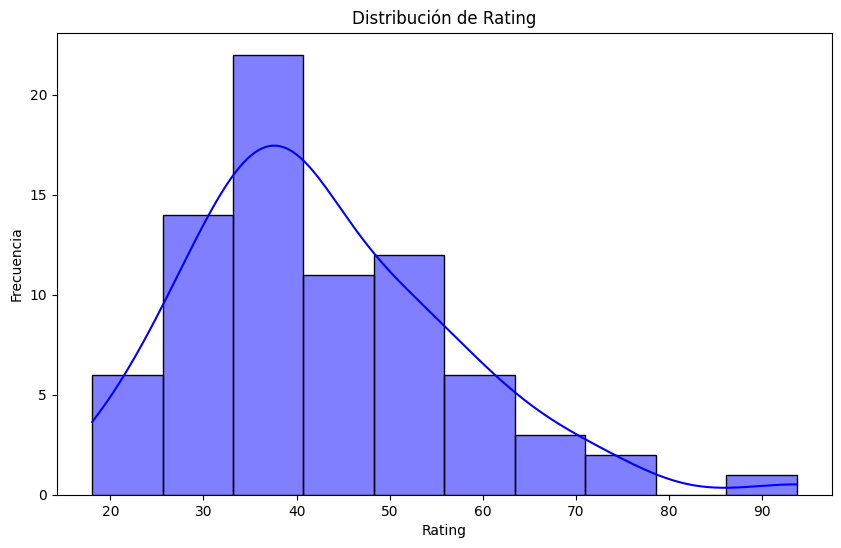




El rango más frecuente de la variable rating es:
rating
(33.175, 40.741]    22
Name: count, dtype: int64




In [9]:
print("Ejercicio 3a: ¿Cuál es el rango más frecuente de la variable rating?")
# Histograma para la variable rating
plt.figure(figsize=(10, 6))
sns.histplot(cereals_df['rating'], bins=10, kde=True, color='blue')
plt.title('Distribución de Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()
print("\n\n")

# Respuesta explícita
print("El rango más frecuente de la variable rating es:")
rating_counts = pd.cut(cereals_df['rating'], bins=10).value_counts().sort_values(ascending=False)
print(rating_counts.head(1))
print("\n")

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

Ejercicio 3b: ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?


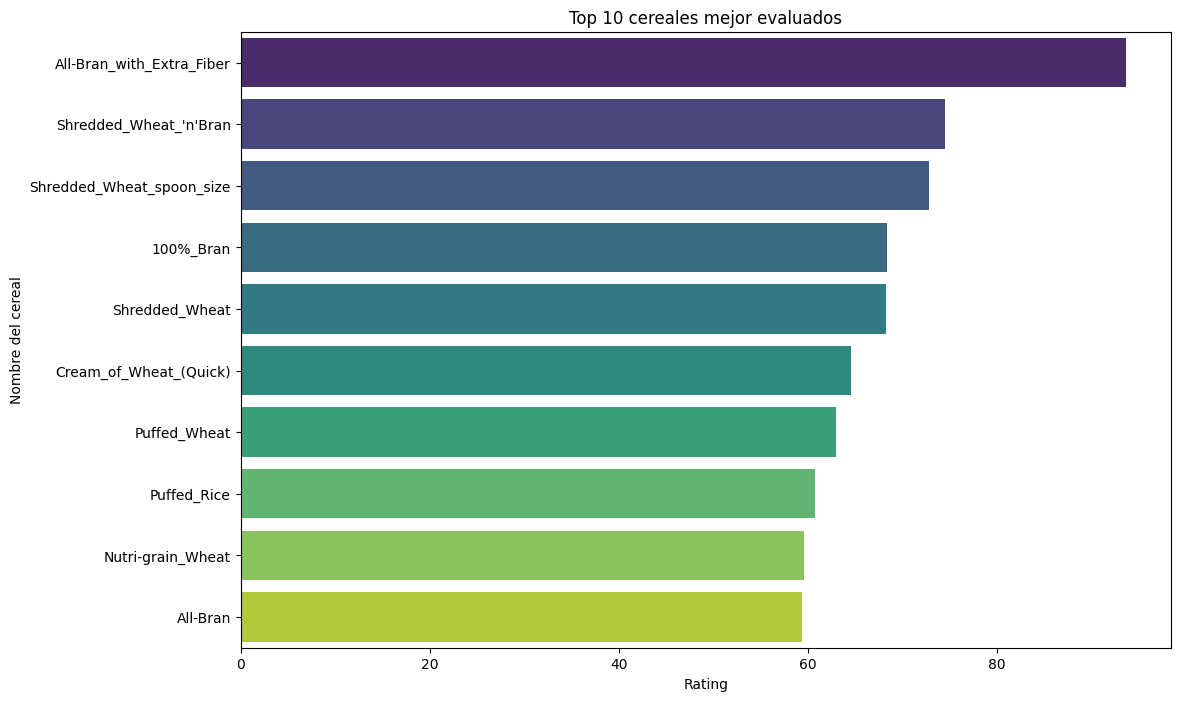




Los Mejores Cereales son:
                         name mfr     rating
3   All-Bran_with_Extra_Fiber   K  93.704912
64     Shredded_Wheat_'n'Bran   N  74.472949
65  Shredded_Wheat_spoon_size   N  72.801787
0                   100%_Bran   N  68.402973
63             Shredded_Wheat   N  68.235885
20     Cream_of_Wheat_(Quick)   N  64.533816
55               Puffed_Wheat   Q  63.005645
54                Puffed_Rice   Q  60.756112
50          Nutri-grain_Wheat   K  59.642837
2                    All-Bran   K  59.425505




In [10]:
print("Ejercicio 3b: ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?")

# Obtener los 10 cereales mejor evaluados
mejores_cereales = cereals_df.nlargest(10, 'rating')[['name', 'mfr', 'rating']]

# Gráfico de barras para los 10 cereales mejor evaluados
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='name', data=mejores_cereales, hue='name', palette='viridis', dodge=False)
plt.title('Top 10 cereales mejor evaluados')
plt.xlabel('Rating')
plt.ylabel('Nombre del cereal')
plt.legend([], [], frameon=False)
plt.show()
print("\n\n")

#los mejores cereales
print("Los Mejores Cereales son:")
print(mejores_cereales)
print("\n")

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

Ejercicio 4a: Compara la distribución de las calorías según el fabricante, por medio de boxplots.


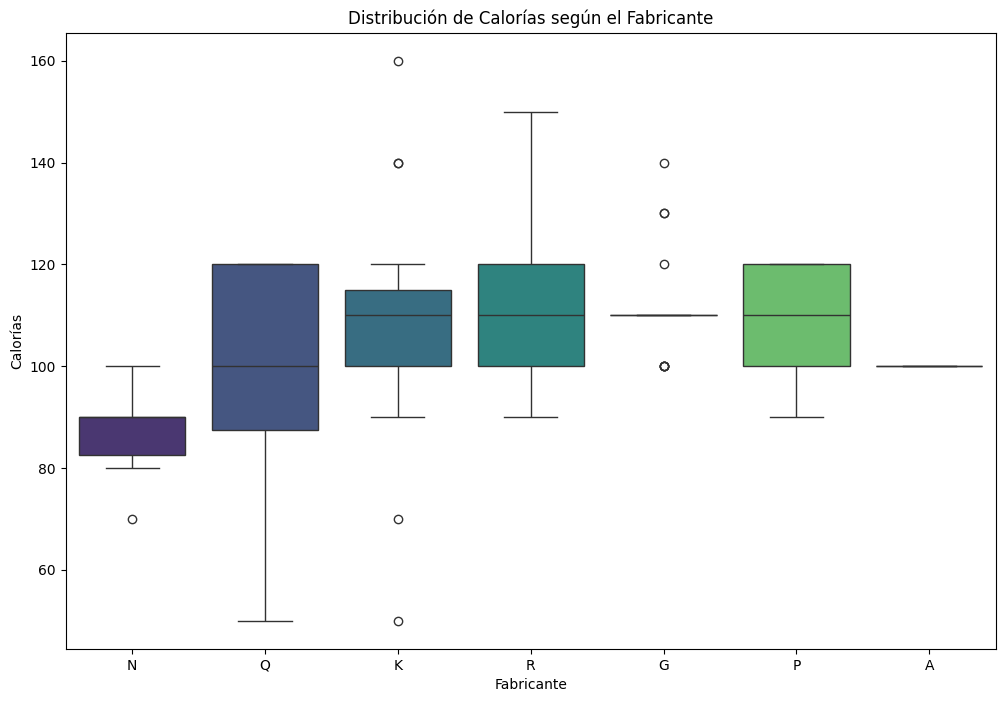




La comparación de la distribución de las calorías según el fabricante es la siguiente:
     count        mean        std    min    25%    50%    75%    max
mfr                                                                 
A      1.0  100.000000        NaN  100.0  100.0  100.0  100.0  100.0
G     22.0  111.363636  10.371873  100.0  110.0  110.0  110.0  140.0
K     23.0  108.695652  22.218818   50.0  100.0  110.0  115.0  160.0
N      6.0   86.666667  10.327956   70.0   82.5   90.0   90.0  100.0
P      9.0  108.888889  10.540926   90.0  100.0  110.0  120.0  120.0
Q      8.0   95.000000  29.277002   50.0   87.5  100.0  120.0  120.0
R      8.0  115.000000  22.677868   90.0  100.0  110.0  120.0  150.0




In [11]:
print("Ejercicio 4a: Compara la distribución de las calorías según el fabricante, por medio de boxplots.")
# Boxplot para la distribución de calorías según el fabricante
plt.figure(figsize=(12, 8))
sns.boxplot(x='mfr', y='calories', data=cereals_df, hue='mfr', palette='viridis', legend=False)
plt.title('Distribución de Calorías según el Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Calorías')
plt.show()
print("\n\n")

# Respuesta explícita
print("La comparación de la distribución de las calorías según el fabricante es la siguiente:")
print(cereals_df.groupby('mfr')['calories'].describe())
print("\n")

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

Ejercicio 4b: ¿Cuáles son las dos variables que tienen mayor correlación con rating?


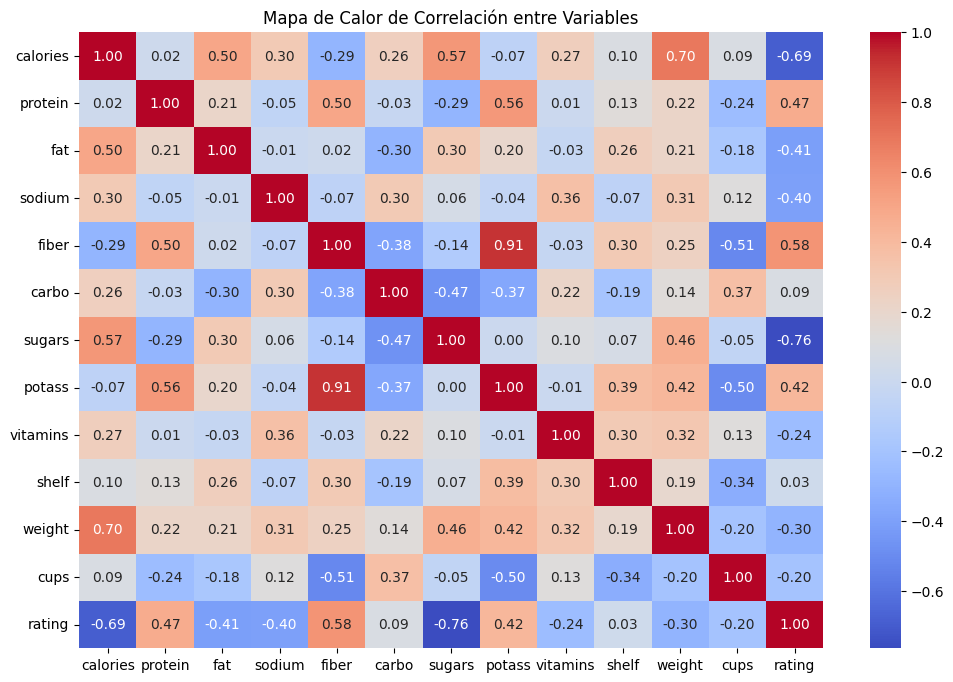




Las dos variables que tienen mayor correlación con rating son:
fiber      0.584160
protein    0.470618
Name: rating, dtype: float64




In [12]:
print("Ejercicio 4b: ¿Cuáles son las dos variables que tienen mayor correlación con rating?")
# Mapa de calor para la correlación entre las variables numéricas
plt.figure(figsize=(12, 8))
correlacion = cereals_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()
print("\n\n")

# Respuesta explícita
print("Las dos variables que tienen mayor correlación con rating son:")
correlacion_rating = correlacion['rating'].sort_values(ascending=False)
print(correlacion_rating.head(3)[1:3])
print("\n")

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [13]:
# Identificar registros con datos faltantes
registrosFaltantes = cereals_df[cereals_df.isnull().any(axis=1)]
numRegistrosFaltantes = registrosFaltantes.shape[0]
numValoresFaltantes = cereals_df.isnull().sum().sum()

print("Índice del Ejercicio 5: Todos los registros con algún dato faltante")
print(f"Número total de registros en el DataFrame: {cereals_df.shape[0]}")
print(f"Número de registros con datos faltantes: {numRegistrosFaltantes}")
print(f"Número total de valores faltantes: {numValoresFaltantes}")
print("\n")

# Mostrar índice del registro, nombre del cereal y columnas con datos faltantes
for idx, row in registrosFaltantes.iterrows():
    columnasFaltantes = row[row.isnull()].index.tolist()
    print(f"Índice: {idx}, Nombre del cereal: {row['name']}, Columnas con datos faltantes: {columnasFaltantes}")
print("\n\n")

# Eliminar registros con datos faltantes
cereals_df_sin_faltantes = cereals_df.dropna()
print("Registros eliminados con éxito")
print(f"Número de registros restantes: {cereals_df_sin_faltantes.shape[0]}")
print("\n")

# Reiniciar el índice
cereals_df_sin_faltantes.reset_index(drop=True, inplace=True)
print("Índice reiniciado con éxito")
print("\n")

# Mostrar el nuevo DataFrame
print("El nuevo DataFrame, cereals_df_sin_faltantes, es (muestra):")
print(cereals_df_sin_faltantes.head())
print("\n")

Índice del Ejercicio 5: Todos los registros con algún dato faltante
Número total de registros en el DataFrame: 77
Número de registros con datos faltantes: 3
Número total de valores faltantes: 4


Índice: 4, Nombre del cereal: Almond_Delight, Columnas con datos faltantes: ['potass']
Índice: 20, Nombre del cereal: Cream_of_Wheat_(Quick), Columnas con datos faltantes: ['potass']
Índice: 57, Nombre del cereal: Quaker_Oatmeal, Columnas con datos faltantes: ['carbo', 'sugars']



Registros eliminados con éxito
Número de registros restantes: 74


Índice reiniciado con éxito


El nuevo DataFrame, cereals_df_sin_faltantes, es (muestra):
                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C       

# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [14]:
# Separar la variable de salida (rating) y los predictores numéricos
Y = cereals_df_sin_faltantes['rating']
X = cereals_df_sin_faltantes.select_dtypes(include=[np.number]).drop(columns=['rating'])

# Escalar los valores de X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Mostrar la nueva representación de los datos
print("Proyección de los datos en el nuevo espacio de vectores (PCA):")
print("\n")
print(X_pca)
print("\n")

Proyección de los datos en el nuevo espacio de vectores (PCA):


[[ 4.87039945e+00  2.93423770e+00 -5.52655787e-02  2.44647398e-01
  -1.10203497e+00  9.04575058e-01 -2.35388469e-01 -2.47786978e-01
  -1.24798598e-01  4.63312673e-02  2.38706446e-01  2.13419227e-02]
 [ 1.76110972e+00 -2.10992893e-01 -3.01405840e+00 -4.94129495e-01
   3.27550644e+00  1.06504119e+00  4.89639928e-01  8.95201062e-01
  -8.35394459e-01 -5.95071190e-01  6.99540953e-02 -8.95233091e-02]
 [ 4.72716085e+00  2.40225446e+00  8.69027529e-01 -9.58226015e-02
  -1.35738772e+00  1.39386087e+00 -1.21033982e+00  1.82089211e-01
   1.39267426e-01  9.07759887e-02 -4.88301890e-01 -3.55704815e-02]
 [ 5.14281386e+00  4.40182602e+00  1.88315297e+00  2.09853821e-01
  -1.66238654e+00  9.55808054e-01  2.89694590e-01  8.65569384e-01
  -6.82678015e-01  9.93001036e-02  7.08471201e-01  1.08197957e-01]
 [-3.32393651e-01 -2.84619125e-01 -1.49092910e+00 -9.44312678e-01
  -3.11262143e-01  8.28871600e-01 -4.93652142e-01 -8.08360915e-01
  -7.12

7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

El número mínimo de componentes principales que explican más del 90% de la varianza es: 7


Porcentaje de varianza explicada por cada componente principal:
[0.2766149  0.22059749 0.1488355  0.08479752 0.08202324 0.05748156
 0.05498713 0.03467223 0.02614423 0.00764976 0.0046911  0.00150535]


Porcentaje de varianza acumulada:
[0.2766149  0.49721239 0.64604788 0.7308454  0.81286864 0.87035019
 0.92533733 0.96000956 0.98615378 0.99380355 0.99849465 1.        ]




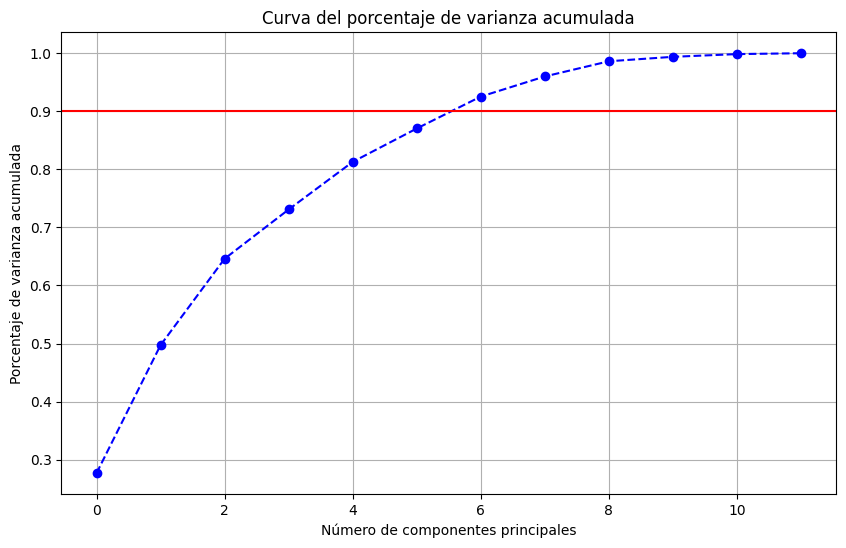

In [15]:
# Obtener la curva del porcentaje de varianza acumulada
varianzaAcumulada = np.cumsum(pca.explained_variance_ratio_)

# Determinar el número mínimo de componentes que explique más del 90% de la varianza
numComponentes90 = np.where(varianzaAcumulada >= 0.90)[0][0] + 1

# Imprimir la información de dichos componentes
print(f"El número mínimo de componentes principales que explican más del 90% de la varianza es: {numComponentes90}")
print("\n")
print("Porcentaje de varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)
print("\n")
print("Porcentaje de varianza acumulada:")
print(varianzaAcumulada)
print("\n")

# Graficar la curva del porcentaje de varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(varianzaAcumulada, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.title('Curva del porcentaje de varianza acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.grid(True)
plt.show()

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [16]:
# Obtener las cargas de los componentes principales
cargasComponentes = pca.components_

# Identificar las tres variables más importantes en el cálculo del primer componente
primerComponente = cargasComponentes[0]
indicesVariablesImportantes = np.argsort(np.abs(primerComponente))[-3:]

variablesImportantes = X.columns[indicesVariablesImportantes]

print("Las tres variables más importantes en el cálculo del primer componente son:")
print(variablesImportantes)

Las tres variables más importantes en el cálculo del primer componente son:
Index(['cups', 'fiber', 'potass'], dtype='object')


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

In [17]:
# Identificar las variables categóricas
variablesCategoricas = cereals_df_sin_faltantes.select_dtypes(include=['object']).columns

# Verificar si todas las variables categóricas son predictores
print("Variables categóricas:")
print(variablesCategoricas)
print("\n")

# Para este ejercicio, asumimos que todas las variables categóricas son predictores

# Aplicar una técnica de encoding (one-hot encoding) a las variables categóricas
cereals_df_encoded = pd.get_dummies(cereals_df_sin_faltantes, columns=variablesCategoricas, drop_first=True)

# Justificación del método one-hot encoding
print("Se eligió el método one-hot encoding porque es adecuado para variables categóricas nominales, ")
print("permitiendo que cada categoría se represente como una columna binaria (0 o 1), lo que evita suposiciones de orden o relación entre categorías.")
print("\n")

print("Variables categóricas codificadas con one-hot encoding. DataFrame resultante:")
print(cereals_df_encoded.head())
print("\n")

Variables categóricas:
Index(['name', 'mfr', 'type'], dtype='object')


Se eligió el método one-hot encoding porque es adecuado para variables categóricas nominales, 
permitiendo que cada categoría se represente como una columna binaria (0 o 1), lo que evita suposiciones de orden o relación entre categorías.


Variables categóricas codificadas con one-hot encoding. DataFrame resultante:
   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0     6.0   280.0        25   
1       120        3    5      15    2.0    8.0     8.0   135.0         0   
2        70        4    1     260    9.0    7.0     5.0   320.0        25   
3        50        4    0     140   14.0    8.0     0.0   330.0        25   
4       110        2    2     180    1.5   10.5    10.0    70.0        25   

   shelf  ...  name_Wheat_Chex  name_Wheaties  name_Wheaties_Honey_Gold  \
0      3  ...            False          False                     False 

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [18]:
# Seleccionar el número mínimo de componentes principales que explican más del 90% de la varianza
X_pca_seleccionado = X_pca[:, :numComponentes90]

# Conjuntar las proyecciones en los componentes seleccionados con las transformaciones de las variables categóricas y la variable de salida
df_resultante = pd.DataFrame(X_pca_seleccionado, columns=[f'PC{i+1}' for i in range(numComponentes90)])
df_resultante = pd.concat([df_resultante, cereals_df_encoded.reset_index(drop=True)], axis=1)
df_resultante['rating'] = Y.reset_index(drop=True)

# Almacenar el DataFrame resultante en un archivo
df_resultante.to_csv('cereals_df_procesado.csv', index=False)

print("DataFrame resultante:")
print(df_resultante.head())
print("\n")
print("El DataFrame resultante se ha almacenado en el archivo 'cereals_df_procesado.csv'")

DataFrame resultante:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.870399  2.934238 -0.055266  0.244647 -1.102035  0.904575 -0.235388   
1  1.761110 -0.210993 -3.014058 -0.494129  3.275506  1.065041  0.489640   
2  4.727161  2.402254  0.869028 -0.095823 -1.357388  1.393861 -1.210340   
3  5.142814  4.401826  1.883153  0.209854 -1.662387  0.955808  0.289695   
4 -0.332394 -0.284619 -1.490929 -0.944313 -0.311262  0.828872 -0.493652   

   calories  protein  fat  ...  name_Wheat_Chex  name_Wheaties  \
0        70        4    1  ...            False          False   
1       120        3    5  ...            False          False   
2        70        4    1  ...            False          False   
3        50        4    0  ...            False          False   
4       110        2    2  ...            False          False   

   name_Wheaties_Honey_Gold  mfr_G  mfr_K  mfr_N  mfr_P  mfr_Q  mfr_R  type_H  
0                     False  False  False   True  